# Weather Australia

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pt
import plotly.express as px
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

In [98]:
weather = pd.read_csv("WheterAU/weatherAUS.csv")
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


<AxesSubplot:title={'center':'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

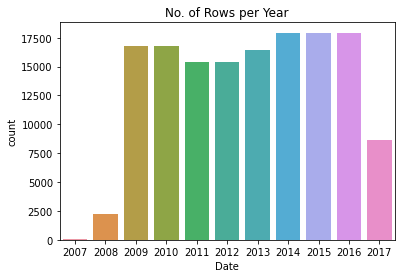

In [4]:
plt.title('No. of Rows per Year')
sns.countplot(x=pd.to_datetime(weather.Date).dt.year)

## Relationship between Sunshine and Evaporation

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

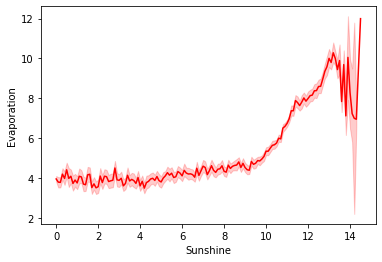

In [5]:
sns.lineplot(data=weather,x='Sunshine',y='Evaporation',color='red')

## Relationship between Sunshine and Rainfall
#### When sunshine increases, rainfall decreases

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

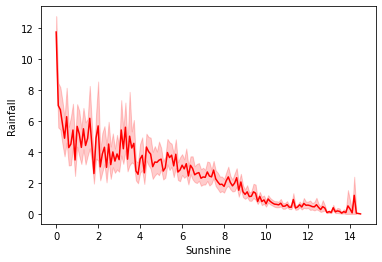

In [6]:
sns.lineplot(data=weather,x='Sunshine',y='Rainfall',color='red')

<AxesSubplot:>

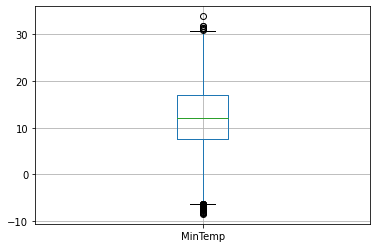

In [7]:
weather[['MinTemp']].boxplot()

In [8]:
#df_copy = weather
#drop = df_copy.drop(columns=['Date','Location','WindGustDir','WindDir9am', 'WindDir3pm', 'Cloud9am','Cloud3pm'])
#sns.pairplot(drop)
#sns.pairplot(x_vars =['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed'],
             #y_vars = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed'],
             #data = weather[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation','Sunshine', 'WindGustSpeed','RainToday']],
             #hue = 'RainToday')
#plt.show()

## Relationship between Sunshine and MinTemp & MaxTemp

<AxesSubplot:xlabel='Sunshine', ylabel='MaxTemp'>

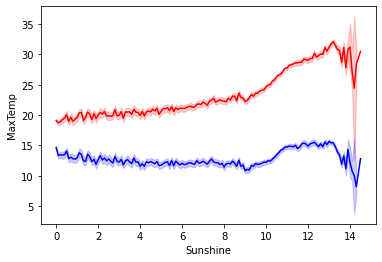

In [9]:
sns.lineplot(data=weather,x='Sunshine',y='MaxTemp',color='red')
sns.lineplot(data=weather,x='Sunshine',y='MinTemp',color='blue')

## Relationship between WindGustSpeed and Rainfall
### There is a not clear relationship between WindGustSpeed and Rainfall

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

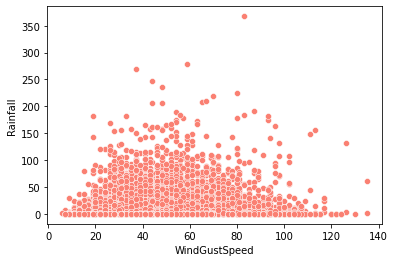

In [10]:
sns.scatterplot(data=weather,x='WindGustSpeed',y='Rainfall',color='salmon')

## Relationship between Sunshine and WindGustSpeed

<AxesSubplot:xlabel='WindGustSpeed', ylabel='Sunshine'>

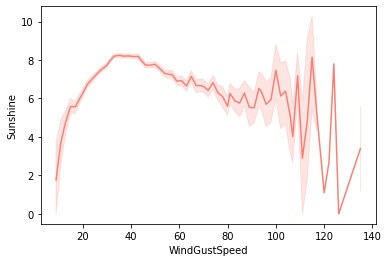

In [11]:
sns.lineplot(data=weather,x='WindGustSpeed',y='Sunshine',color='salmon')

## Country with the count of RainToday

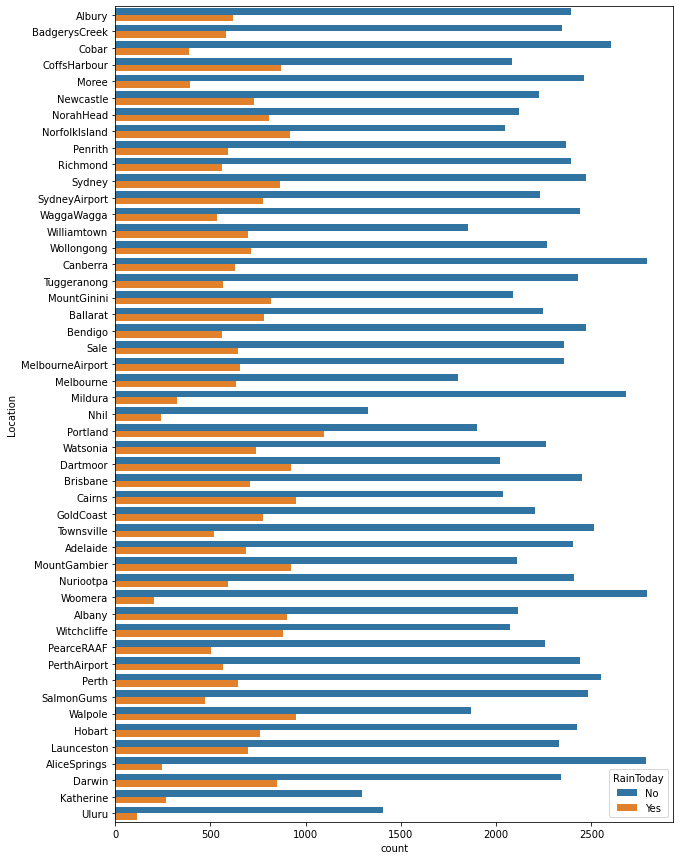

In [12]:
plt.figure(figsize = (10,15))
sns.countplot(y = 'Location',hue = 'RainToday', data = weather)
plt.show()

## TOP 20 Country with max rainfall

C:\Users\Utente\AppData\Local\Temp\ipykernel_2900\191866656.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df=weather.groupby(by='Location').max().sort_values(by='Rainfall',ascending=False)[0:20]


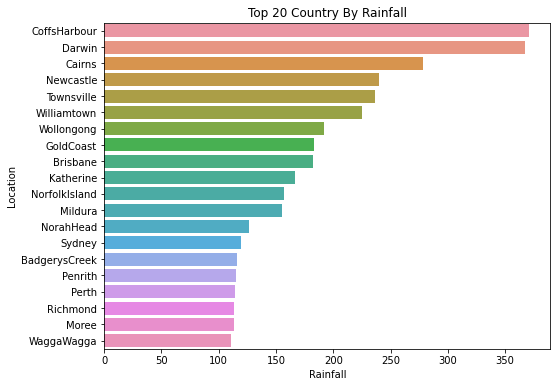

In [13]:
df=weather.groupby(by='Location').max().sort_values(by='Rainfall',ascending=False)[0:20]
plt.figure(figsize=(8,6))
sns.barplot(data=df,y=df.index,x='Rainfall')
plt.title("Top 20 Country By Rainfall")
plt.show()

## Correlation between Sunshine and Evaporation hue by RainTomorrow

<AxesSubplot:xlabel='Sunshine', ylabel='Evaporation'>

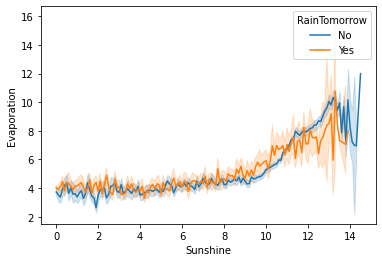

In [14]:
sns.lineplot(data=weather,x='Sunshine',y='Evaporation',hue='RainTomorrow')

## Total sum of rainfall per year

In [15]:
df=weather.groupby(by=pd.to_datetime(weather.Date).dt.year).max().sort_values(by='Rainfall')
fig = px.bar(df,y='Rainfall')
fig.show()


C:\Users\Utente\AppData\Local\Temp\ipykernel_2900\1848920830.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df=weather.groupby(by=pd.to_datetime(weather.Date).dt.year).max().sort_values(by='Rainfall')


## Correlation between datas

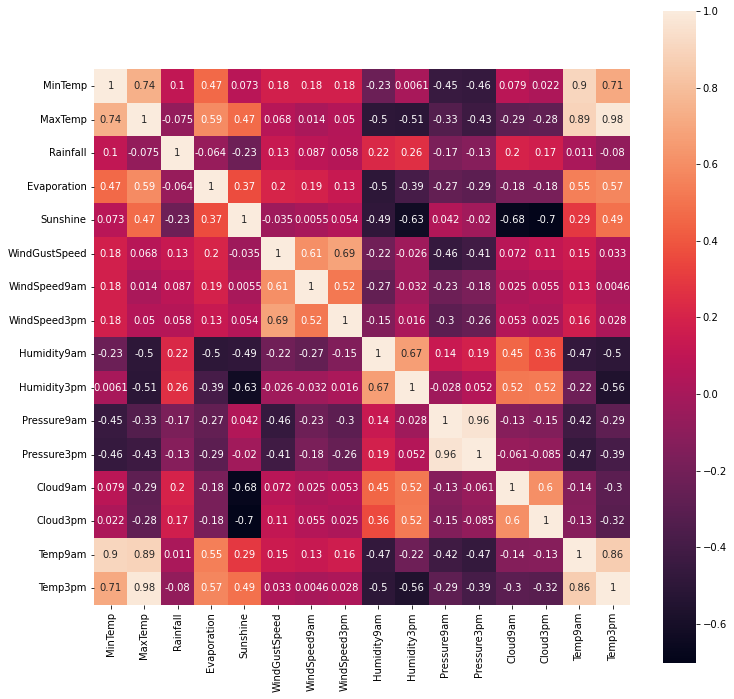

In [16]:
df2 = weather
check_data = df2.drop(columns=['Date','Location'])
plt.subplots(figsize=(12, 12))
sns.heatmap(check_data.corr(), annot=True, square=True)
plt.show()


## Time series analysis

In [17]:
import statsmodels
from datetime import datetime

### Time series analysis : Rainfall in Sydney 
#### In this section, we build the time series model to forecast the weather in Sydney tomorrow. Will there be rain in Sydney?

In [18]:
weather_ts = weather
weather_ts['Date']=pd.to_datetime(weather_ts['Date'])
weather_ts['day'] = weather_ts['Date'].dt.day
weather_ts['month'] = weather_ts['Date'].dt.month
weather_ts['year'] = weather_ts['Date'].dt.year
weather_ts.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,day,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


In [41]:
#time series analysis
sydneyweather = weather_ts[weather_ts.Location == 'Sydney']
sydneyweather = sydneyweather[['Date','Rainfall']]
sydneyweather.set_index('Date',inplace=True)
sydneyweather.head()

,Rainfall
Date,
2008-02-01,15.6
2008-02-02,6.0
2008-02-03,6.6
2008-02-04,18.8
2008-02-05,77.4


In [42]:
sydneyweather.head

<bound method NDFrame.head of             Rainfall
Date                
2008-02-01      15.6
2008-02-02       6.0
2008-02-03       6.6
2008-02-04      18.8
2008-02-05      77.4
...              ...
2017-06-21       0.0
2017-06-22       0.0
2017-06-23       0.0
2017-06-24       0.0
2017-06-25       0.0

[3344 rows x 1 columns]>

In [21]:
sydney_rainfall_averages = sydneyweather.groupby(['month']).Rainfall.mean().reset_index()
sydney_lowtemp_averages = sydneyweather.groupby(['month']).MinTemp.mean().reset_index()
sydney_hightemp_averages = sydneyweather.groupby(['month']).MaxTemp.mean().reset_index()

###### Here, we should compare the data range within the dataset and the actual date range in days. In time series analysis, it is required that all periods are present. There should be a frequency in the data; here, it is in days.

In [22]:
#Date Range in Sydney Weather
print(sydneyweather.index)
print('\nUnique Dates in the Dataset: ',len(sydneyweather.index.unique()), ' Days')

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3344, freq=None)

Unique Dates in the Dataset:  3344  Days


In [23]:
#missing dates
total_data = pd.date_range(sydneyweather.index.min(), sydneyweather.index.max())
print('Total days in the date range:', len(total_data), 'Days')

Total days in the date range: 3433 Days


In [24]:
new_index = pd.date_range(sydneyweather.index.min(), sydneyweather.index.max())
print(new_index)

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', length=3433, freq='D')


###### Out of the 3433 dates, there are 3344 days present. The new index contains data from all periods; missing data is filled with the average rainfall over the years.

In [43]:
sydneyweather = sydneyweather.reindex(new_index, fill_value=sydneyweather['Rainfall'].mean())

In [44]:
sydneyweather_monthly = sydneyweather.resample('M').mean()
print("Monthly Averages:")
print(sydneyweather_monthly.head())

Monthly Averages:
            Rainfall
2008-02-29  8.910345
2008-03-31  2.045161
2008-04-30  4.886667
2008-05-31  0.096774
2008-06-30  4.240000


In [45]:
#First Differences
print("Monthly Temperature Averages, First Difference \n",sydneyweather_monthly.diff().head())

Monthly Temperature Averages, First Difference 
             Rainfall
2008-02-29       NaN
2008-03-31 -6.865184
2008-04-30  2.841505
2008-05-31 -4.789892
2008-06-30  4.143226


In [46]:
#Percentual Differences
#First Differences
print("Monthly Temperature Averages, First Difference \n",sydneyweather_monthly.pct_change().head())

Monthly Temperature Averages, First Difference 
              Rainfall
2008-02-29        NaN
2008-03-31  -0.770473
2008-04-30   1.389380
2008-05-31  -0.980196
2008-06-30  42.813333


<AxesSubplot:title={'center':'Monthly Rainfall Averages'}>

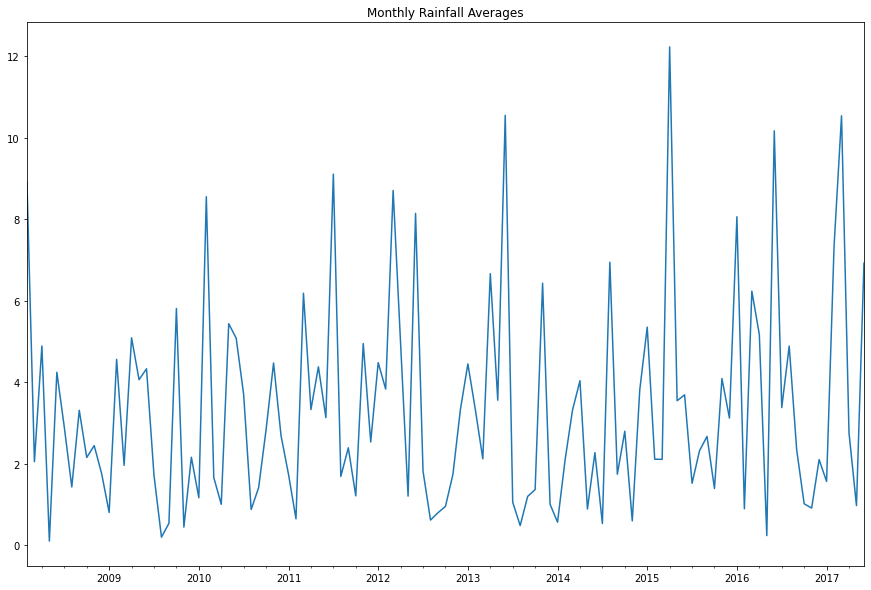

In [47]:
#plot averages
sydneyweather_monthly['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages')

<AxesSubplot:title={'center':'Monthly Rainfall Averages: First Differences'}>

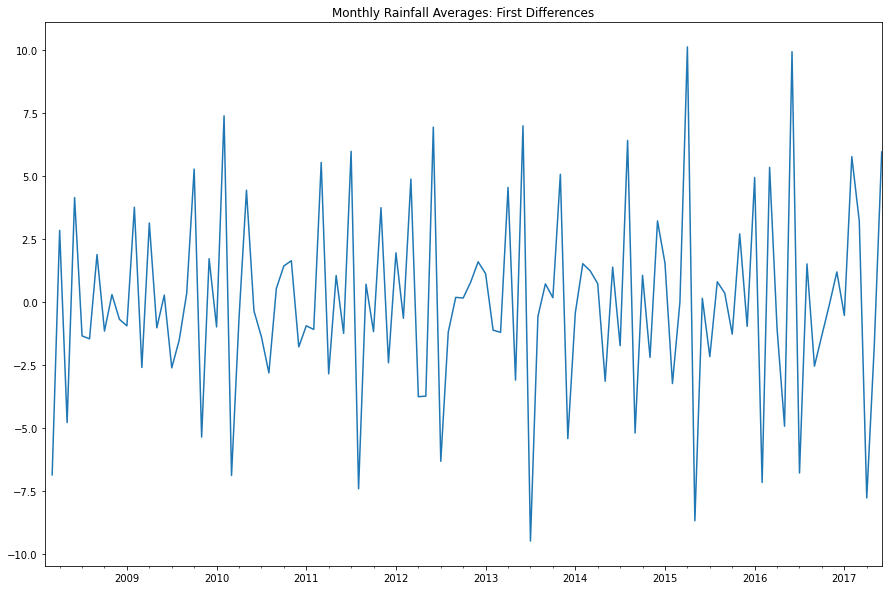

In [48]:
#First Differences Plot
sydney_fst_diff = sydneyweather_monthly.diff()
sydney_fst_diff['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages: First Differences')

<AxesSubplot:title={'center':'Monthly Rainfall Averages: Differences in %'}>

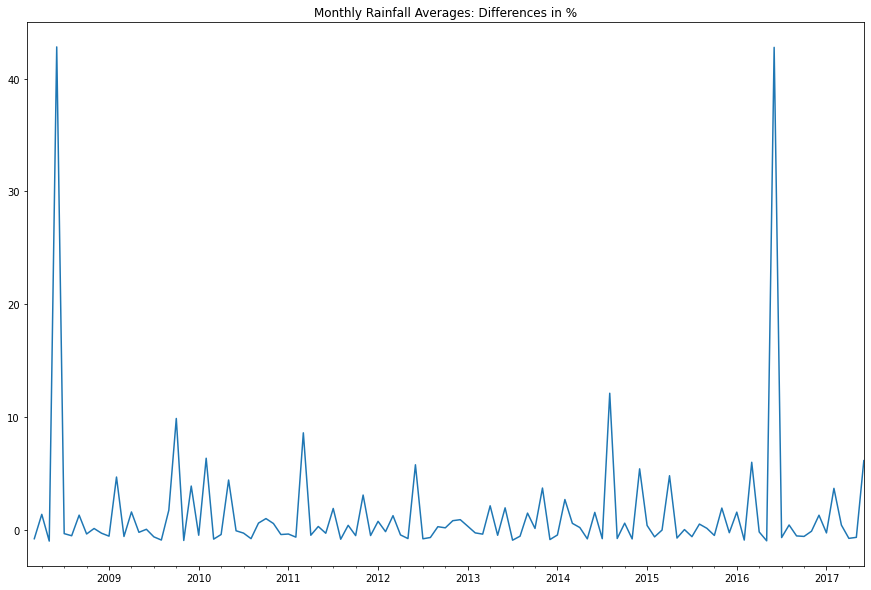

In [49]:
#Differences Plot in Percentages
sydney_percent_diff = sydneyweather_monthly.pct_change()
sydney_percent_diff['Rainfall'].plot(figsize=(15,10), title='Monthly Rainfall Averages: Differences in %')

In [157]:
#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

result = adfuller(sydneyweather_monthly['Rainfall'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -11.663954
p-value: 0.000000


In [51]:
#plot time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

C:\Python310\lib\site-packages\matplotlib\axes\_base.py:2475: UserWarning:




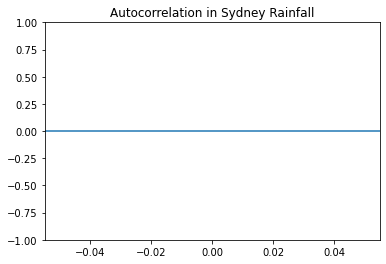

In [53]:
#autocorrelation plot
acf_plot = plot_acf(sydneyweather['Rainfall'], lags=12, title='Autocorrelation in Sydney Rainfall')

C:\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



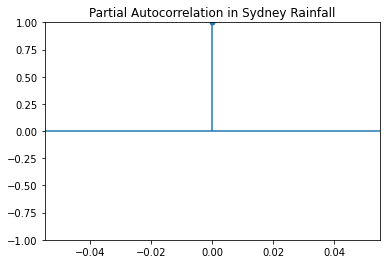

In [54]:
#autocorrelation plot
pacf_plot = plot_pacf(sydneyweather['Rainfall'], lags=12, title='Partial Autocorrelation in Sydney Rainfall')


Monthly Data Seasonal Plot


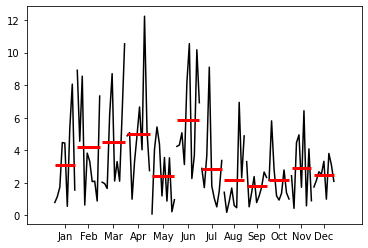

In [55]:
#seasonality plot 
print('\nMonthly Data Seasonal Plot')
m_plot = month_plot(sydneyweather_monthly['Rainfall'])

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

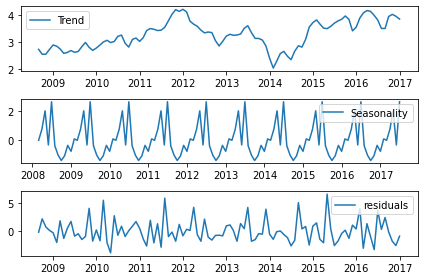

In [57]:
decomposition  = seasonal_decompose(sydneyweather_monthly)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(311)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(312)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(313)
plt.plot(residual,label='residuals')
plt.legend(loc='best')
plt.tight_layout()

#### Time series analysis: second type

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Date', ylabel='Rainfall'>

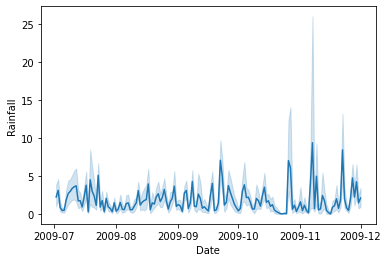

In [162]:
mask = (weather['Date'] > '2009-07-1') & (weather['Date'] <= '2009-12-1')
var = weather.loc[mask]

sns.lineplot(var.Date,var.Rainfall)

In [160]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
#mask = (weather['Date'] > '2010-8-1') & (weather['Date'] <= '2010-12-10')
#var = weather.loc[mask]
#print(var)
result = adfuller(var.MaxTemp.dropna())
print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])

ADF Statistic: -8.955051
p-value: 0.000000


# Powerlifting

In [164]:
powerlifting = pd.read_csv("Powerlifting/openpowerlifting.csv")
powerlifting.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47


In [165]:
meets = pd.read_csv("Powerlifting/meets.csv")
meets.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


In [166]:
openpowerlifting = pd.merge(left=powerlifting, right=meets, how='inner', on='MeetID')
openpowerlifting.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,...,TotalKg,Place,Wilks,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,...,138.35,1,155.05,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,...,401.42,1,456.38,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,...,401.42,1,456.38,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,...,95.25,1,108.29,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,...,122.47,1,130.47,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
